In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Libraries

In [3]:
import numpy as np
import pandas as pd


from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/target_encoded_dataset.csv')
dataset.head()

,airline,dep_time,arr_time,type,source,destination,flight_day,flight_month,num_of_stops,formatted_price,num_of_hours_taken,week_day_of_flight,distance_bet_2_countries
0,3,4,3,1,4,4,11,2,1,54306,11,4,0.984105
1,3,2,3,0,4,4,11,2,1,17829,17,4,0.755223
2,4,3,2,0,4,4,11,2,1,14150,10,4,0.451862
3,4,4,3,0,4,4,11,2,1,13258,15,4,0.258401
4,4,2,2,0,4,4,11,2,0,6363,14,4,0.653497


# **Spliting the Dataset**

In [5]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price','num_of_hours_taken','flight_day'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [6]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

# **Modeling**

In [7]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[21:38:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.9430137964220788
Test Score: 0.9583921377055172
r2_score: 0.9583921377055172
MSE: 21418125.915270135
RMSE: 4627.972116950375
MAE: 2735.116703473293
----------------------------------------


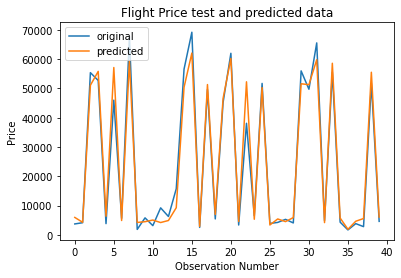

----------------------------------------
Using model: PR
Training Score: 0.9260910124914985
Test Score: 0.944747964675344
r2_score: 0.9351167495892697
MSE: 33399399.787796747
RMSE: 5779.221382487155
MAE: 3787.876513501542
----------------------------------------


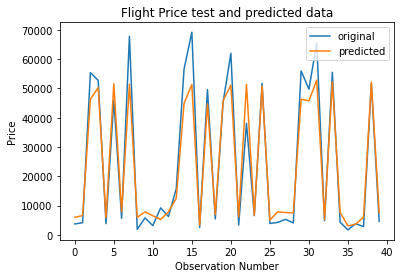

----------------------------------------
Using model: HGBR
Training Score: 0.9533739673568572
Test Score: 0.9671491315563325
r2_score: 0.9671491315563325
MSE: 16910362.56014868
RMSE: 4112.221122477326
MAE: 2295.4926929345907
----------------------------------------


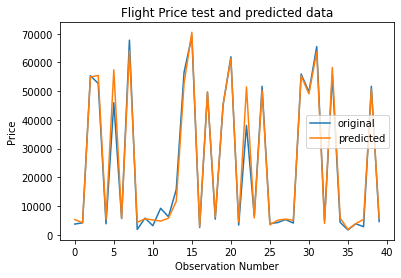

----------------------------------------
Using model: LGBMR
Training Score: 0.9533941278724911
Test Score: 0.9671797063607206
r2_score: 0.9671797063607206
MSE: 16894623.82775278
RMSE: 4110.307023538848
MAE: 2298.9066257035224
----------------------------------------


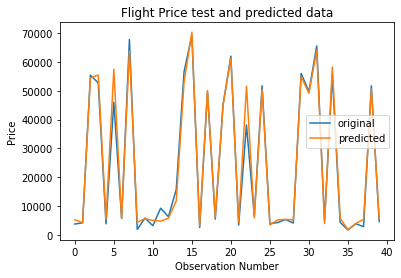

----------------------------------------
Using model: LR
Training Score: 0.8975778787640676
Test Score: 0.9152345409591374
r2_score: 0.9152345409591374
MSE: 43633995.47310093
RMSE: 6605.603339067593
MAE: 4271.615630512527
----------------------------------------


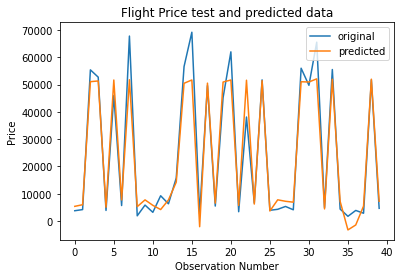

----------------------------------------
Using model: GBR
Training Score: 0.943019308626664
Test Score: 0.9584238150814185
r2_score: 0.9584238150814185
MSE: 21401819.621500026
RMSE: 4626.210071051684
MAE: 2720.659742738019
----------------------------------------


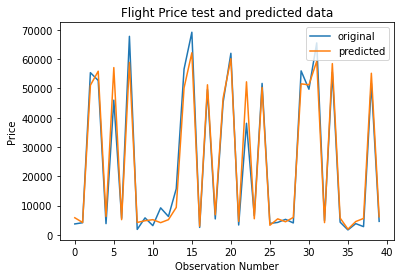

----------------------------------------
Using model: ETR
Training Score: 0.9592483601559583
Test Score: 0.9679989018918274
r2_score: 0.9679989018918274
MSE: 16472933.501287762
RMSE: 4058.6861792072273
MAE: 2124.1651391883915
----------------------------------------


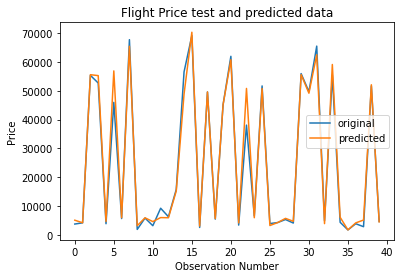

----------------------------------------
Using model: BR
Training Score: 0.9588076908821005
Test Score: 0.9677734110944307
r2_score: 0.9677734110944307
MSE: 16589007.484065223
RMSE: 4072.960530629437
MAE: 2129.3958139605325
----------------------------------------


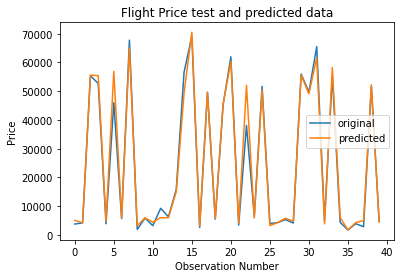

----------------------------------------
Using model: DT
Training Score: 0.9592483616377019
Test Score: 0.9679143918853501
r2_score: 0.9679143918853501
MSE: 16516435.999614153
RMSE: 4064.0418304459113
MAE: 2127.3266672476116
----------------------------------------


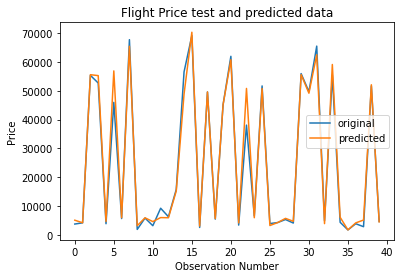

----------------------------------------
Using model: RF
Training Score: 0.9591276492799715
Test Score: 0.9680122452995712
r2_score: 0.9680122452995712
MSE: 16466064.828603428
RMSE: 4057.8399215103873
MAE: 2124.2041943428294
----------------------------------------


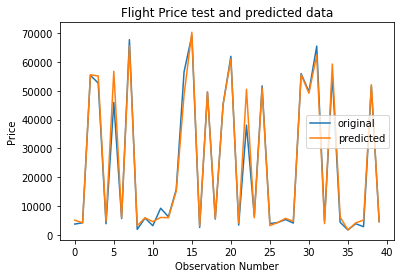

----------------------------------------


In [8]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)

    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)


